# 1. For the 3 labeled images, plot the expert labels for the presence or absence of clouds according to a
map (i.e. use the X, Y coordinates).

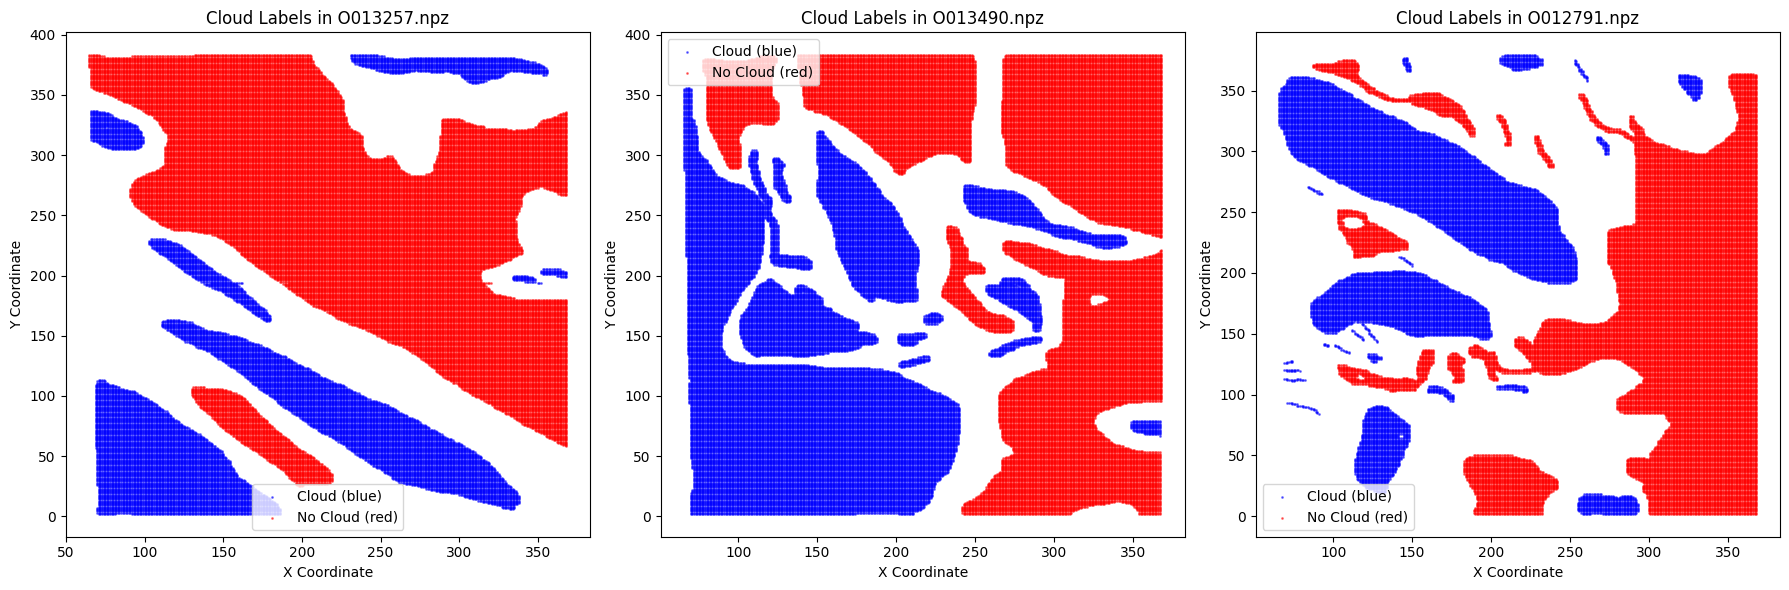

In [19]:
import numpy as np
import matplotlib.pyplot as plt

labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"]

def plot_cloud_labels(file, ax):
    data = np.load(file)
    arr = data["arr_0"]  
    
    x, y, labels = arr[:, 1], arr[:, 0], arr[:, 10] 

    cloud_mask = labels == 1
    no_cloud_mask = labels == -1  

    ax.scatter(x[cloud_mask], y[cloud_mask], color='blue', label='Cloud (blue)', alpha=0.5, s=1)
    ax.scatter(x[no_cloud_mask], y[no_cloud_mask], color='red', label='No Cloud (red)', alpha=0.5, s=1)
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()
    ax.set_title(f"Cloud Labels in {file}")

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for each file in the corresponding subplot
for i, file in enumerate(labeled_files):
    plot_cloud_labels(file, axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# 2. Explore the relationships between the radiances of different angles, both visually and quantitatively.
Do you notice differences between the two classes (cloud, no cloud) based on the radiances? Are
there differences based on the features (CORR, NDAI, SD)?

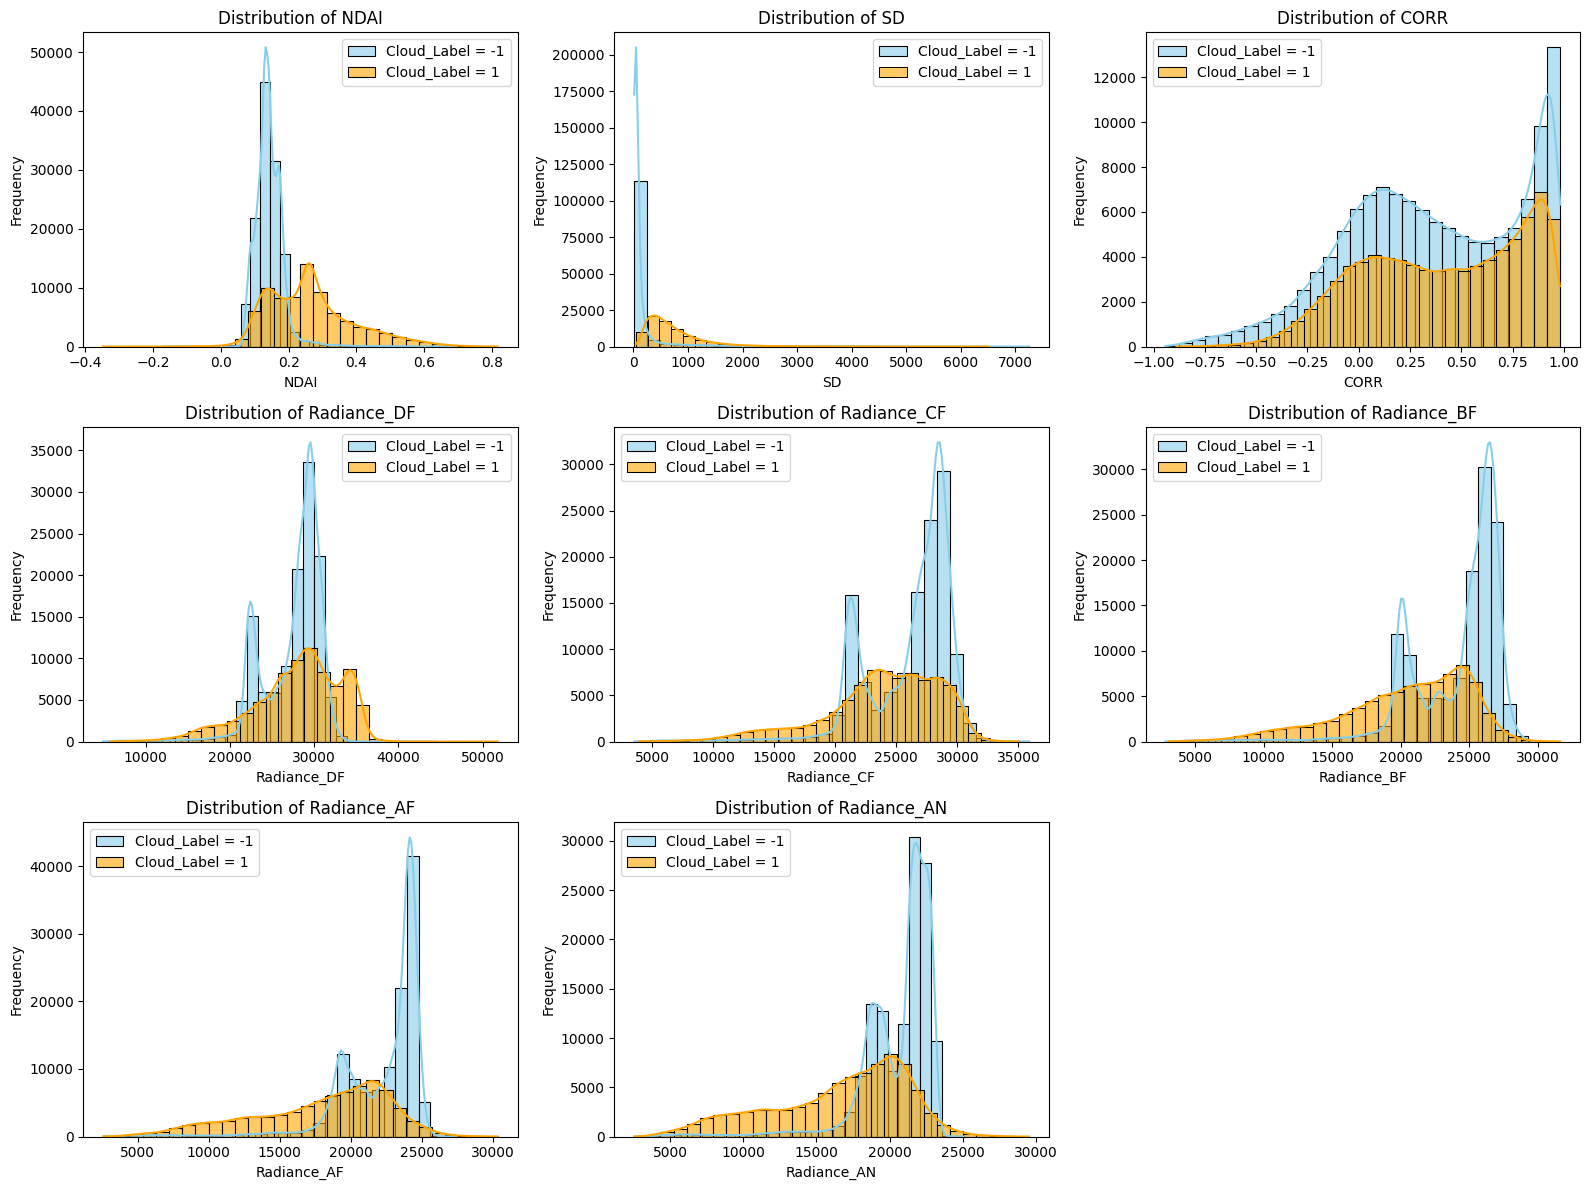

(345005, 11)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of files to load
labeled_files = ["O013257.npz", "O013490.npz", "O012791.npz"] 

all_data = []  # List to store dataframes from each file

# Load and concatenate data from all files
for file in labeled_files:
    data = np.load(f"/Users/jl/Downloads/image_data/{file}")
    arr = data["arr_0"]
    
    df_3 = pd.DataFrame({
        'Cloud_Label': arr[:, 10],  # Cloud Label
        'y_coordinate': arr[:, 0],  # y coordinate
        'x_coordinate': arr[:, 1],  # x coordinate
        'NDAI': arr[:, 2],  # NDAI
        'SD': arr[:, 3],  # SD
        'CORR': arr[:, 4],  # CORR
        'Radiance_DF': arr[:, 5],  # Radiance angle DF
        'Radiance_CF': arr[:, 6],  # Radiance angle CF
        'Radiance_BF': arr[:, 7],  # Radiance angle BF
        'Radiance_AF': arr[:, 8],  # Radiance angle AF
        'Radiance_AN': arr[:, 9],  # Radiance angle AN
    })
    
    all_data.append(df_3)

# Combine all data into a single DataFrame
df_3 = pd.concat(all_data, ignore_index=True)

# Ensure the Cloud_Label is treated as a categorical type
df_3['Cloud_Label'] = df_3['Cloud_Label'].astype('category')

# List of feature columns to plot the distributions
feature_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']

# Plot the distribution of each feature, separated by Cloud_Label
plt.figure(figsize=(16, 12))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    
    # Plot distribution for Cloud_Label == -1
    sns.histplot(df_3[df_3['Cloud_Label'] == -1][col], kde=True, color='skyblue', bins=30, label='Cloud_Label = -1', alpha=0.6)
    
    # Plot distribution for Cloud_Label == 1
    sns.histplot(df_3[df_3['Cloud_Label'] == 1][col], kde=True, color='orange', bins=30, label='Cloud_Label = 1', alpha=0.6)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

print(df_3.shape)  


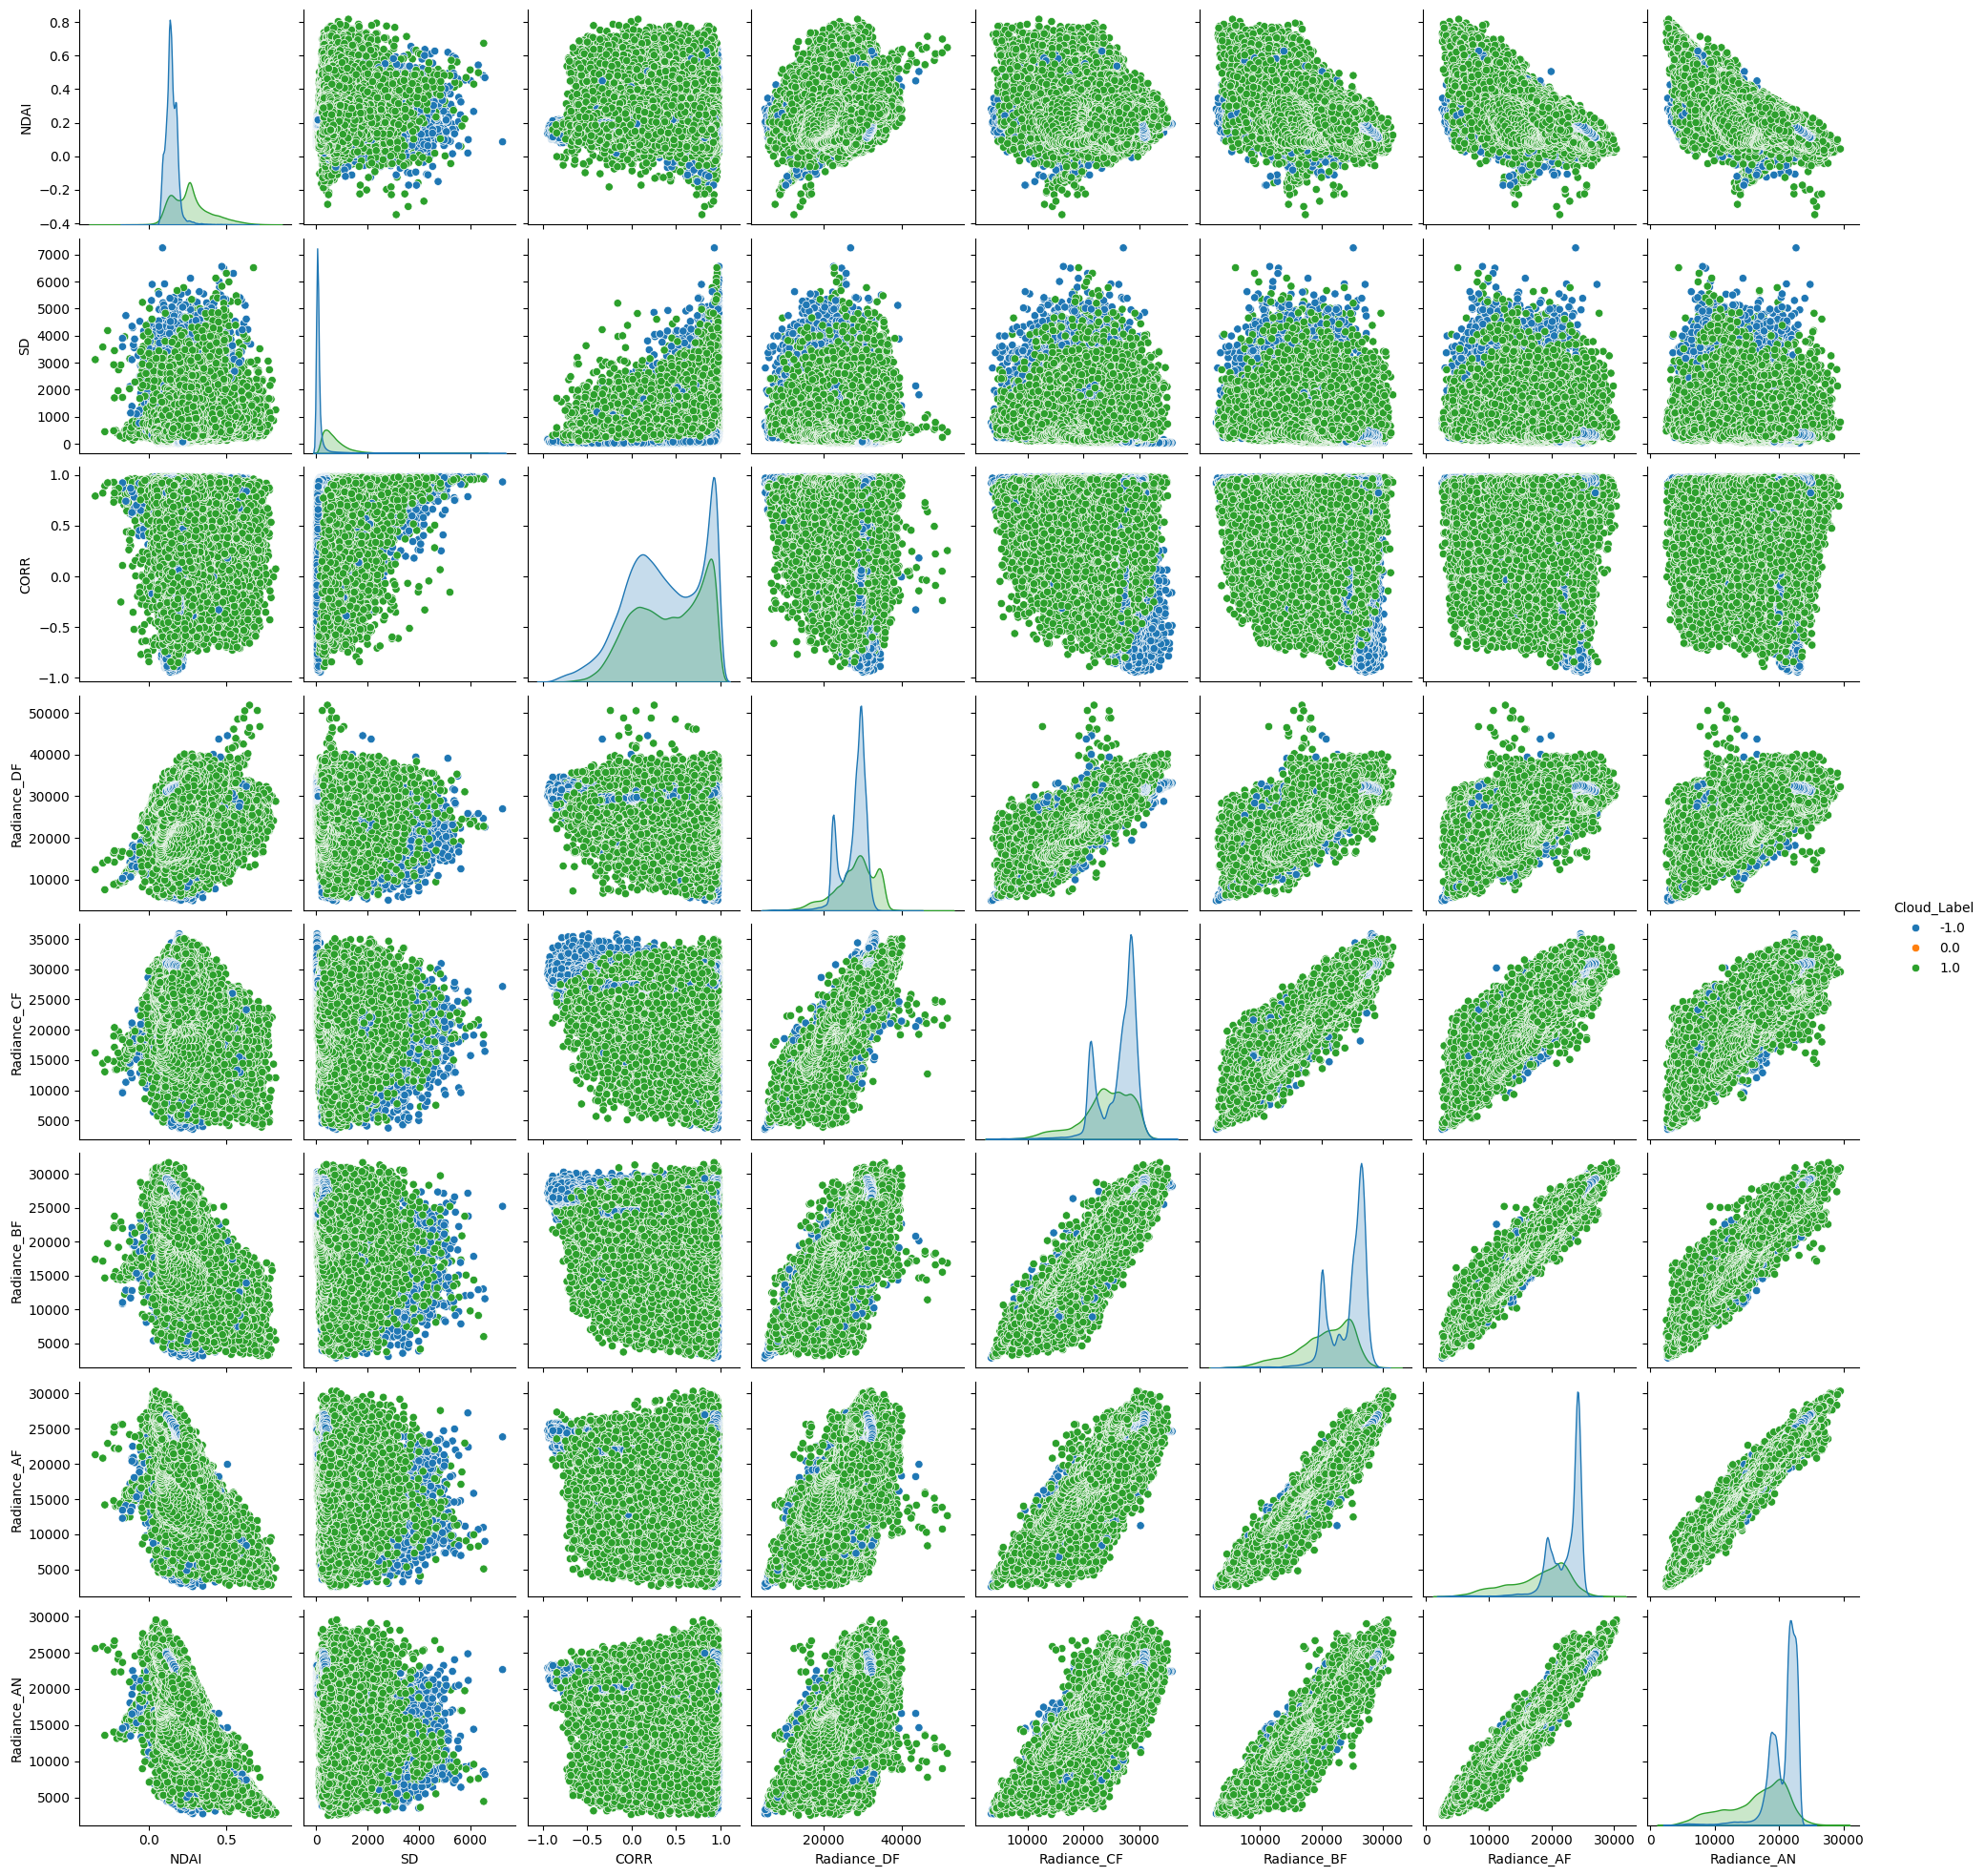

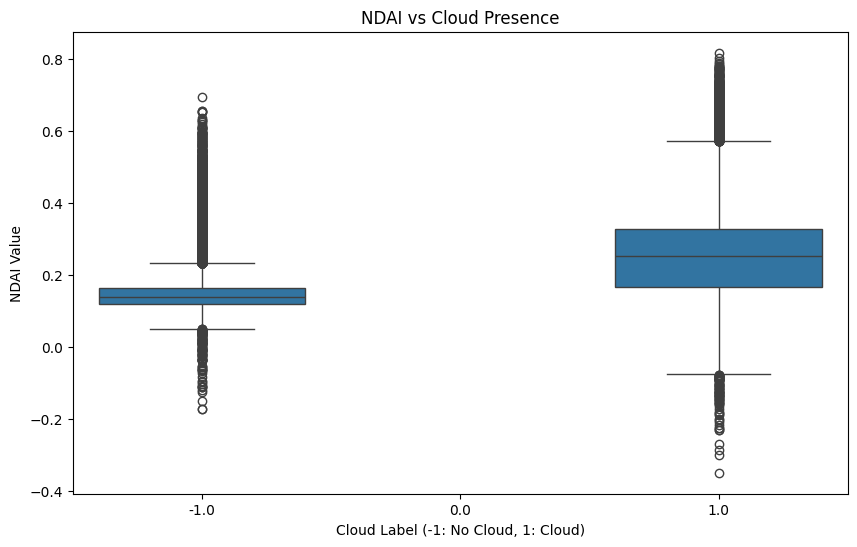

T-test for NDAI: t-statistic=263.6415, p-value=0.0000


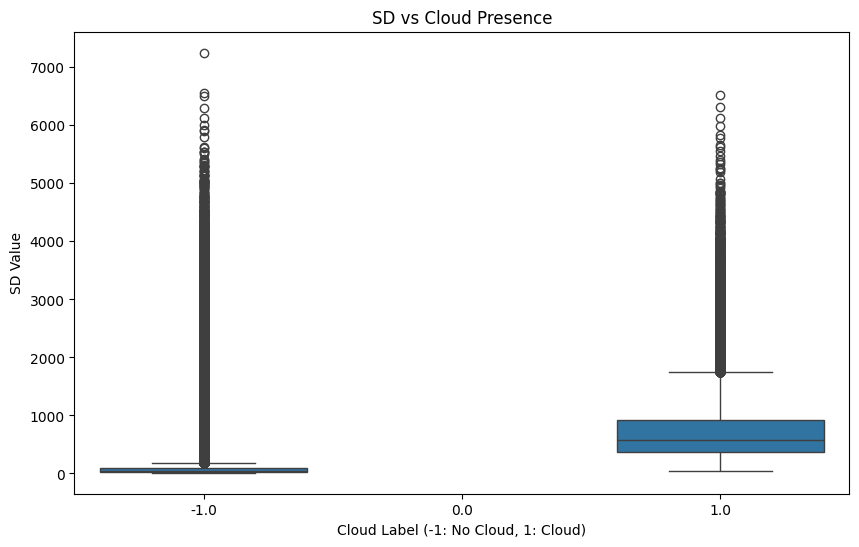

T-test for SD: t-statistic=249.9925, p-value=0.0000


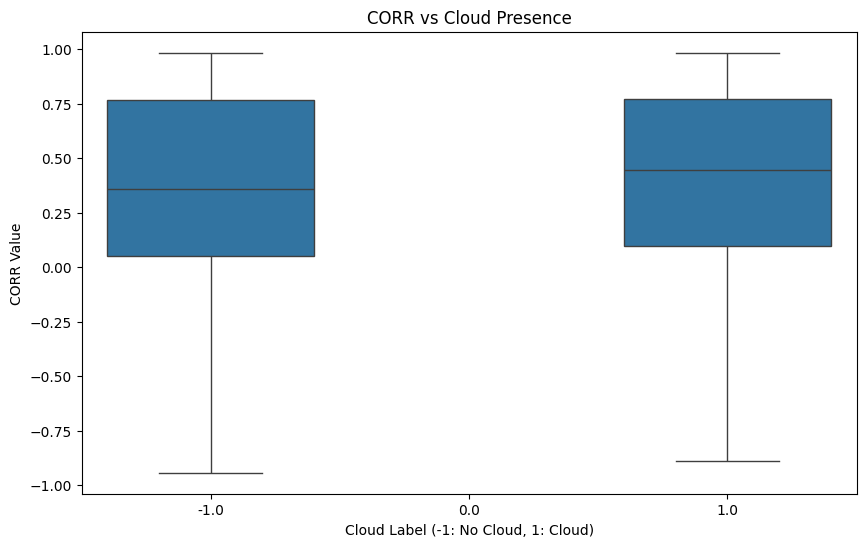

T-test for CORR: t-statistic=26.0462, p-value=0.0000


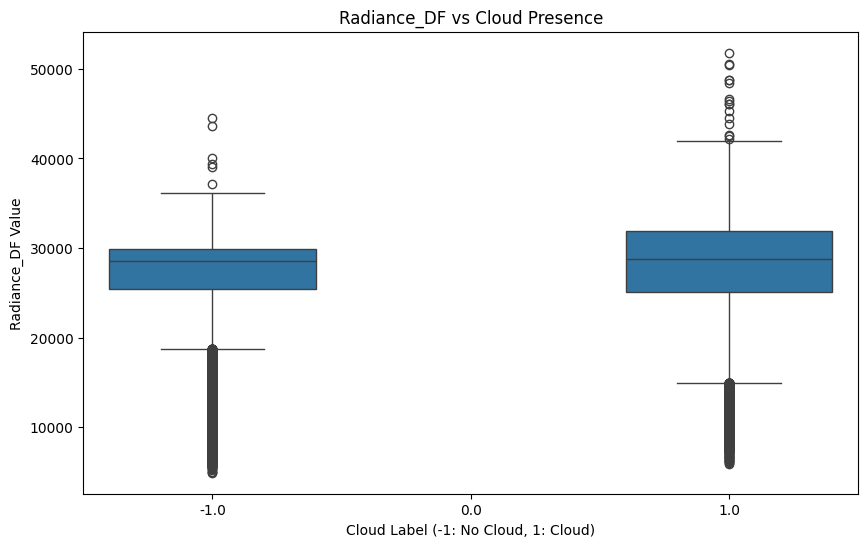

T-test for Radiance_DF: t-statistic=25.9381, p-value=0.0000


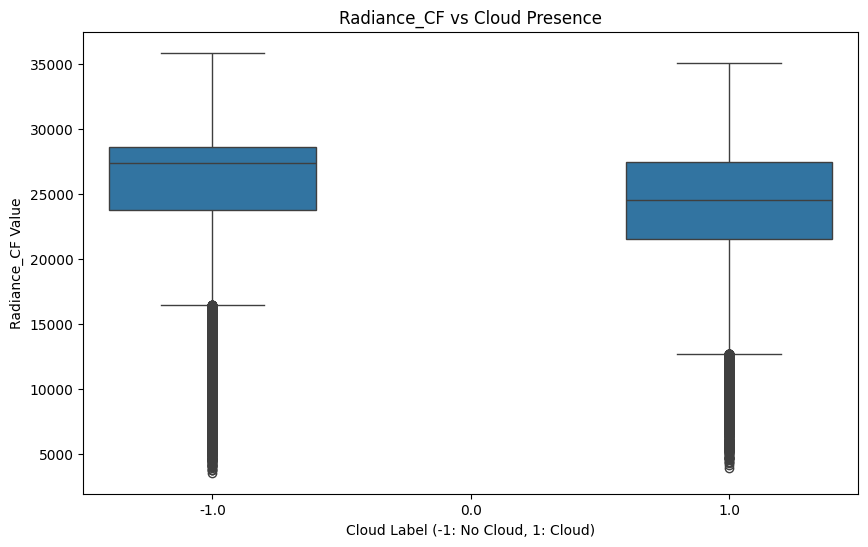

T-test for Radiance_CF: t-statistic=-112.9533, p-value=0.0000


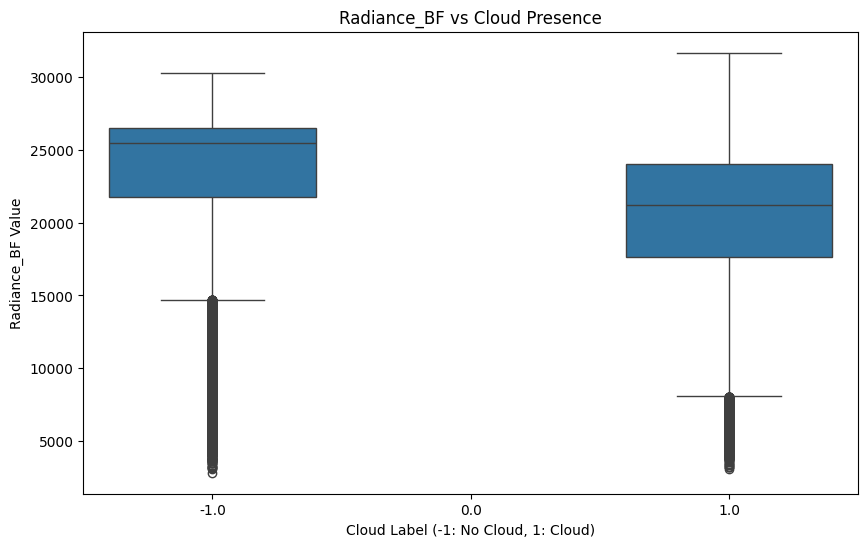

T-test for Radiance_BF: t-statistic=-202.7150, p-value=0.0000


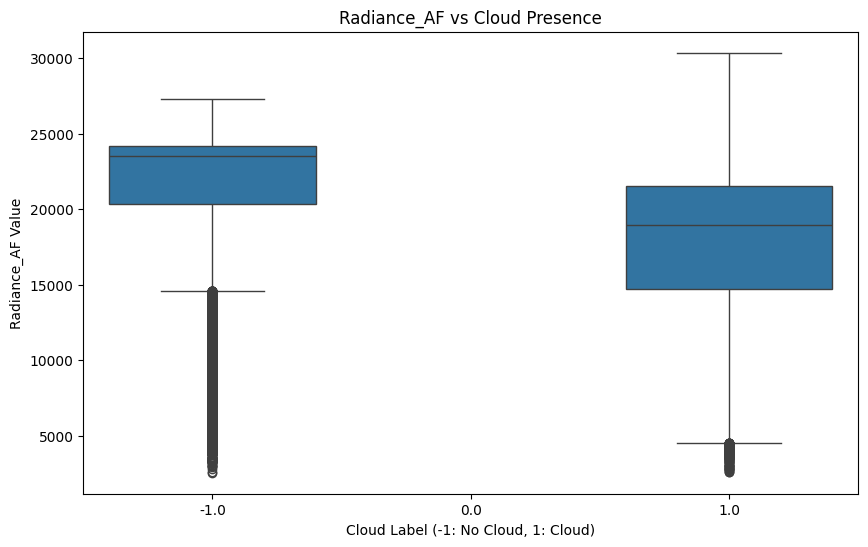

T-test for Radiance_AF: t-statistic=-232.2590, p-value=0.0000


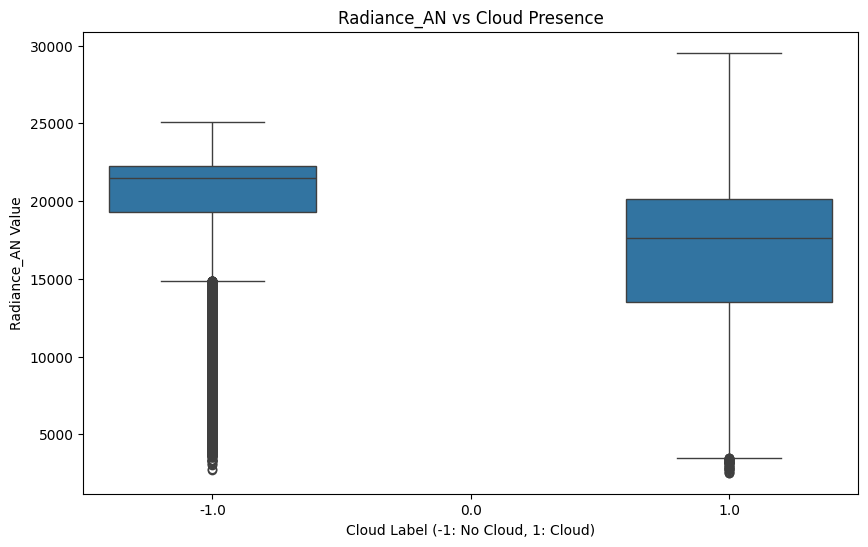

T-test for Radiance_AN: t-statistic=-226.8990, p-value=0.0000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# List of features to analyze
feature_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']

# Create a copy of the DataFrame and remove rows where Cloud_Label is 0
df_without0 = df_3.copy()
df_without0 = df_without0[df_without0['Cloud_Label'] != 0]

# Pairplot for all the features, colored by Cloud_Label
sns.pairplot(df_without0[feature_cols + ['Cloud_Label']], hue="Cloud_Label", diag_kind="kde")
plt.show()

# Boxplot for each feature with respect to Cloud_Label
for col in feature_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_without0["Cloud_Label"], y=df_without0[col])
    plt.title(f"{col} vs Cloud Presence")
    plt.xlabel("Cloud Label (-1: No Cloud, 1: Cloud)")
    plt.ylabel(f"{col} Value")
    plt.show()

    # Perform t-test for each feature between Cloud_Label -1 and 1
    cloud_feature = df_without0[df_without0["Cloud_Label"] == 1][col]
    no_cloud_feature = df_without0[df_without0["Cloud_Label"] == -1][col]

    t_stat, p_value = ttest_ind(cloud_feature, no_cloud_feature, equal_var=False)
    print(f"T-test for {col}: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")


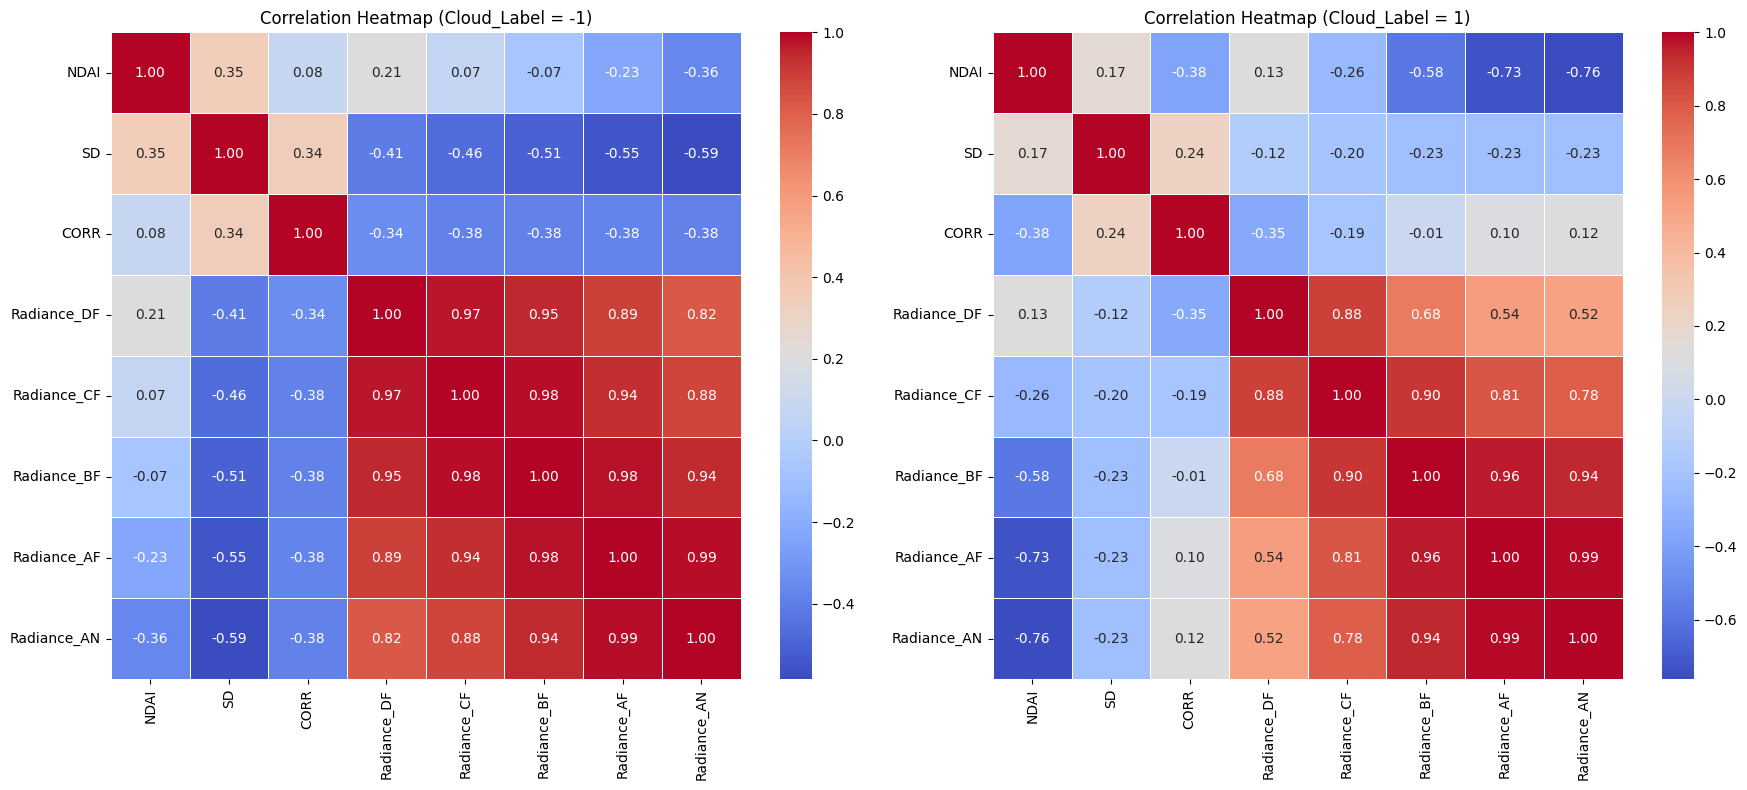

In [17]:
# Select numerical columns for correlation analysis
numeric_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']

# Filter the data for Cloud_Label == -1 and Cloud_Label == 1
df_minus1 = df_3[df_3['Cloud_Label'] == -1]
df_plus1 = df_3[df_3['Cloud_Label'] == 1]

# Compute the correlation matrices
correlation_matrix_minus1 = df_minus1[numeric_cols].corr()
correlation_matrix_plus1 = df_plus1[numeric_cols].corr()

# Plot the correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot heatmap for Cloud_Label == -1
sns.heatmap(correlation_matrix_minus1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Heatmap (Cloud_Label = -1)')

# Plot heatmap for Cloud_Label == 1
sns.heatmap(correlation_matrix_plus1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Heatmap (Cloud_Label = 1)')

plt.tight_layout()
plt.show()


NDAI           0.466840
SD             0.328004
CORR           0.079694
Radiance_DF    0.039090
Radiance_CF   -0.190372
Radiance_BF   -0.327379
Radiance_AN   -0.379072
Radiance_AF   -0.379099
Name: Cloud_Label, dtype: float64


/var/folders/pk/68fqfn_n2kv8x5n7zxkqhjkm0000gn/T/ipykernel_36462/437691383.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_label_sorted.index, y=correlation_with_label_sorted.values, palette='coolwarm')


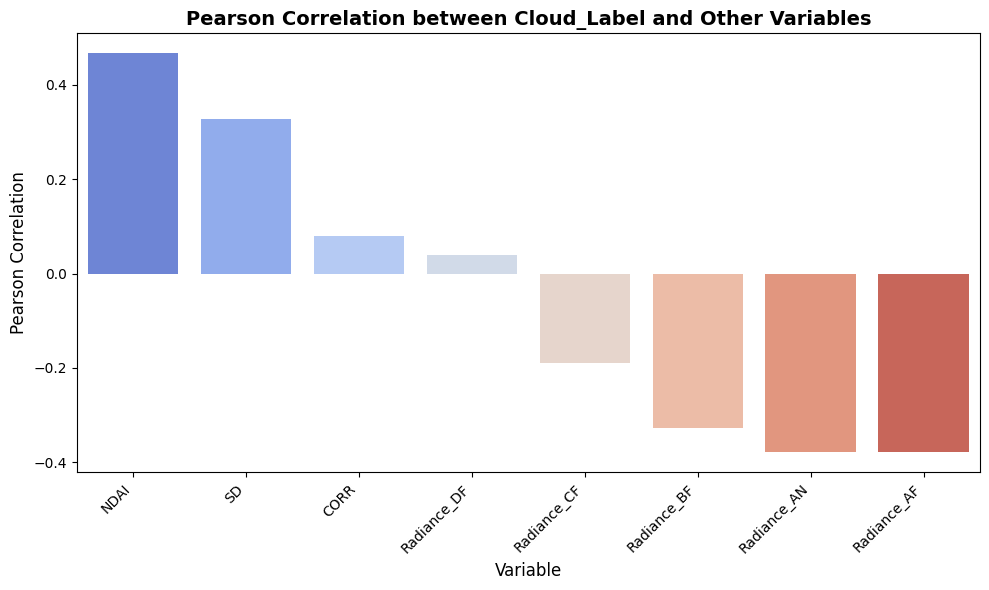

In [18]:
# Select the numerical columns along with 'Cloud_Label' for correlation analysis
cols_with_label = ['Cloud_Label'] + numeric_cols

# Compute the Pearson correlation matrix between the columns
correlation_matrix = df_3[cols_with_label].corr(method='pearson')

# Extract correlation values between 'Cloud_Label' and all other columns
correlation_with_label = correlation_matrix['Cloud_Label'].drop('Cloud_Label')  # Drop 'Cloud_Label' from its own correlation

# Sort the correlations in descending order
correlation_with_label_sorted = correlation_with_label.sort_values(ascending=False)

# Display the correlations
print(correlation_with_label_sorted)

# Plot the correlation values as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_label_sorted.index, y=correlation_with_label_sorted.values, palette='coolwarm')
plt.title('Pearson Correlation between Cloud_Label and Other Variables', fontsize=14, fontweight='bold')
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Pearson Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Split your data into training, validation, and test sets (or training and test, with some cross-validation scheme over the training set). Justify your choice of split based on how it reflects the challenges with possible future applications of your cloud detection algorithm.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_without0[['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']]  # Features
y = df_without0['Cloud_Label']  # Target (Cloud Label)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print the shapes of the splits
print(f"train set: {X_train.shape}, validation set: {X_val.shape}, test set: {X_test.shape}")


train set: (166144, 8), validation set: (20768, 8), test set: (20769, 8)


# 4. As is common when dealing with real world data, these images may have imperfections that you’ll need to clean up. 
Recall the skills you developed during Lab 1.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

directory = "/Users/jl/Downloads/image_data"
files = glob.glob(os.path.join(directory, "*.npz"))

# Initialize an empty list to collect all dataframes
all_data = []

# Loop through each file
for file in files:
    data = np.load(file)
    
    arr = data["arr_0"] 
    
    if arr.shape[1] >= 10:
        df = pd.DataFrame({
            'y_coordinate': arr[:, 0],  # y coordinate
            'x_coordinate': arr[:, 1],  # x coordinate
            'NDAI': arr[:, 2],  # NDAI
            'SD': arr[:, 3],  # SD
            'CORR': arr[:, 4],  # CORR
            'Radiance_DF': arr[:, 5],  # Radiance angle DF
            'Radiance_CF': arr[:, 6],  # Radiance angle CF
            'Radiance_BF': arr[:, 7],  # Radiance angle BF
            'Radiance_AF': arr[:, 8],  # Radiance angle AF
            'Radiance_AN': arr[:, 9],  # Radiance angle AN
        })
    else:
  
        print(f"Warning: {file} does not have enough columns (expected at least 11). Skipping file.")
        continue

    all_data.append(df)

full_df_withoutlabel = pd.concat(all_data, ignore_index=True)

print(full_df_withoutlabel.head())

missing_values = full_df_withoutlabel.isnull().sum()
print("Missing values in each column:\n", missing_values)

   y_coordinate  x_coordinate      NDAI           SD      CORR  Radiance_DF  \
0           2.0          69.0  0.611728  1231.908936 -0.489890      22497.5   
1           2.0          70.0  0.390417  1167.525391  0.013988      19543.0   
2           2.0          71.0  0.232648  1558.338867  0.063005      14891.0   
3           2.0          72.0  0.364688   838.619507 -0.122552      16829.5   
4           2.0          73.0  0.418163   555.085022 -0.401255      17152.5   

   Radiance_CF  Radiance_BF  Radiance_AF  Radiance_AN  
0     15601.00     12522.75     13800.00      5419.75  
1     16885.25     16451.75     11294.50      8568.00  
2     17842.00     17484.00      9030.75      9270.00  
3     14699.75     17251.25      9152.00      7834.75  
4     16176.50     19599.75      9025.25      7037.25  
Missing values in each column:
 y_coordinate    0
x_coordinate    0
NDAI            0
SD              0
CORR            0
Radiance_DF     0
Radiance_CF     0
Radiance_BF     0
Radiance_AF  

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

files = ["O013257.npz", "O013490.npz", "O012791.npz"]

all_data = []
for file in files:
    data = np.load(f"/Users/jl/Downloads/image_data/{file}")
    arr = data["arr_0"]  
    
    if arr.shape[1] >= 11:
        df_final = pd.DataFrame({
            'y_coordinate': arr[:, 0],  # y coordinate
            'x_coordinate': arr[:, 1],  # x coordinate
            'NDAI': arr[:, 2],  # NDAI
            'SD': arr[:, 3],  # SD
            'CORR': arr[:, 4],  # CORR
            'Radiance_DF': arr[:, 5],  # Radiance angle DF
            'Radiance_CF': arr[:, 6],  # Radiance angle CF
            'Radiance_BF': arr[:, 7],  # Radiance angle BF
            'Radiance_AF': arr[:, 8],  # Radiance angle AF
            'Radiance_AN': arr[:, 9],  # Radiance angle AN
            'Cloud_Label': arr[:, 10],  # Cloud presence (1: cloud, -1: no cloud)
        })
        all_data.append(df_final)

full_df = pd.concat(all_data, ignore_index=True)

# 1. Plotting expert labels based on X, Y coordinates
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='x_coordinate', y='y_coordinate', hue='Cloud_Label', data=full_df, palette={1: 'blue', -1: 'red', 0: 'gray'})
# plt.title('Cloud Label Distribution Based on X, Y Coordinates')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.legend(title="Cloud Label", loc='upper left', labels=["Cloud", "No Cloud", "Unlabeled"])
# plt.show()

# 2. Exploring relationships between radiances of different angles
radiance_cols = ['Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']
radiance_data = full_df[radiance_cols + ['Cloud_Label']]

# Plotting pairplot to visually explore relationships between radiance variables
# sns.pairplot(radiance_data, hue='Cloud_Label', palette={1: 'blue', -1: 'red', 0: 'gray'})
# plt.suptitle('Pairplot of Radiance Angles', y=1.02)
# plt.show()

# Statistical analysis of the relationships between radiances and cloud labels
print(radiance_data.groupby('Cloud_Label').mean())

# Check for missing values
missing_values = full_df.isnull().sum()
print("Missing values:\n", missing_values)

# Function to detect and remove outliers using the IQR method
# def remove_outliers(df_final, columns):
#     for col in columns:
#         # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#         Q1 = df_final[col].quantile(0.25)
#         Q3 = df_final[col].quantile(0.75)
#         
#         # Calculate IQR
#         IQR = Q3 - Q1
#         
#         # Define the lower and upper bounds for non-outlier values
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         
#         # Filter out the rows where the column values are outside the bounds
#         df_final = df_final[(df_final[col] >= lower_bound) & (df_final[col] <= upper_bound)]
#     
#     return df_final
# 
# # List of columns to check for outliers (all numerical columns except 'Cloud_Label')
# columns_to_check = ['y_coordinate', 'x_coordinate', 'NDAI', 'SD', 'CORR', 
#                     'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 
#                     'Radiance_AN']
# 
# # Remove outliers from the selected columns
# cleaned_df = remove_outliers(full_df, columns_to_check)

# Display the shape of the cleaned DataFrame to verify the number of rows after outlier removal
print(f"Original shape: {full_df.shape}")



              Radiance_DF   Radiance_CF   Radiance_BF   Radiance_AF  \
Cloud_Label                                                           
-1.0         27456.423926  26099.374660  24192.799444  22200.413738   
 0.0         27320.563134  24820.762502  22393.690834  20362.074223   
 1.0         27997.866775  23911.947335  20384.505907  17869.253254   

              Radiance_AN  
Cloud_Label                
-1.0         20605.630073  
 0.0         18950.795683  
 1.0         16567.729476  
Missing values:
 y_coordinate    0
x_coordinate    0
NDAI            0
SD              0
CORR            0
Radiance_DF     0
Radiance_CF     0
Radiance_BF     0
Radiance_AF     0
Radiance_AN     0
Cloud_Label     0
dtype: int64
Original shape: (345005, 11)


# Part 2

       Feature  Importance
1           SD    0.429424
0         NDAI    0.163121
2         CORR    0.087475
7  Radiance_AN    0.083154
5  Radiance_BF    0.067947
3  Radiance_DF    0.066118
6  Radiance_AF    0.066113
4  Radiance_CF    0.036648


/var/folders/pk/68fqfn_n2kv8x5n7zxkqhjkm0000gn/T/ipykernel_90269/2556019784.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Importance', x='Feature', data=importance_df, palette="viridis")  # 가로 막대그래프 & 색상 변경


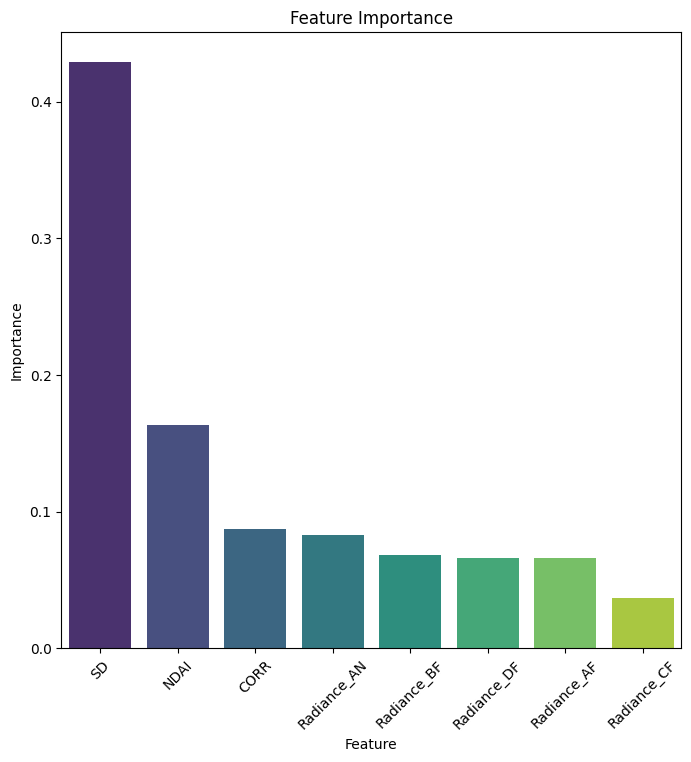

In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.model_selection import train_test_split

feature_cols = ['NDAI', 'SD', 'CORR', 'Radiance_DF', 'Radiance_CF', 'Radiance_BF', 'Radiance_AF', 'Radiance_AN']
X = df_without0[feature_cols] 
y = df_without0['Cloud_Label']  

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8))
sns.barplot(y='Importance', x='Feature', data=importance_df, palette="viridis")  
plt.xticks(rotation=45) 
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()




In [31]:
import numpy as np
import pandas as pd

def make_data(patch_size, df_without0, labeled_files):
    """
    Processes the data, generates patches from the image, and computes texture contrast for each patch.
    
    Parameters:
    patch_size (int): The size of the patch to be generated (side length of square patch).
    df_without0 (DataFrame): The DataFrame containing the coordinates for patch extraction.
    labeled_files (list): List of labeled .npz image files.
    
    Returns:
    DataFrame: The DataFrame with the computed texture contrast feature added, including the generated patches.
    """
    patches = []  # List to store the generated patches
    texture_contrast_list = []  # List to store computed texture contrast values for each patch

    all_data = []  # List to store dataframes from each file

    # Load and concatenate data from all files
    for file in labeled_files:
        data = np.load(f"/Users/jl/Downloads/image_data/{file}")  # Load the .npz file
        
        # Check available data keys to understand the structure of the file
        print(f"Files in {file}: {data.files}")
        
        # Assuming 'arr_0' contains the image data
        arr = data['arr_0']  # Load the image data array
        
        # Convert the data to a DataFrame for easier processing
        file_data = pd.DataFrame({
            'Cloud_Label': arr[:, 10],  # Cloud Label (1 for cloud, -1 for not cloud, 0 for unlabeled)
            'y_coordinate': arr[:, 0],  # y coordinate
            'x_coordinate': arr[:, 1],  # x coordinate
            'NDAI': arr[:, 2],  # NDAI
            'SD': arr[:, 3],  # SD (Standard Deviation)
            'CORR': arr[:, 4],  # CORR (Correlation)
            'Radiance_DF': arr[:, 5],  # Radiance angle DF
            'Radiance_CF': arr[:, 6],  # Radiance angle CF
            'Radiance_BF': arr[:, 7],  # Radiance angle BF
            'Radiance_AF': arr[:, 8],  # Radiance angle AF
            'Radiance_AN': arr[:, 9],  # Radiance angle AN
        })
        
        all_data.append(file_data)
    
    # Concatenate all data into a single DataFrame
    data = pd.concat(all_data, ignore_index=True)

    # Iterate through each row in df_without0 to extract patches
    for i, row in df_without0.iterrows():
        y = row['y_coordinate']  # Extract y coordinate
        x = row['x_coordinate']  # Extract x coordinate
        
        # Load the image data for each file
        for file in labeled_files:
            data = np.load(f"/Users/jl/Downloads/image_data/{file}")
            arr = data['arr_0']
            
            # Extract each channel (NDAI, SD, CORR, Radiance angles) from the image data
            nda_data = arr[:, 2]  # NDAI channel
            sd_data = arr[:, 3]   # SD channel
            corr_data = arr[:, 4] # CORR channel
            radiance_d = arr[:, 5]  # Radiance angle DF
            radiance_c = arr[:, 6]  # Radiance angle CF
            radiance_b = arr[:, 7]  # Radiance angle BF
            radiance_a = arr[:, 8]  # Radiance angle AF
            radiance_n = arr[:, 9]  # Radiance angle AN
            
            # Ensure the patch does not extend beyond the image boundary
            y_start = max(0, y - patch_size // 2)  # Calculate the start point for y (upper bound)
            y_end = min(nda_data.shape[0], y + patch_size // 2)  # Calculate the end point for y (lower bound)
            x_start = max(0, x - patch_size // 2)  # Calculate the start point for x (left bound)
            x_end = min(nda_data.shape[1], x + patch_size // 2)  # Calculate the end point for x (right bound)
            
            # Stack all channels to create a multi-channel patch
            patch = np.stack([
                nda_data[y_start:y_end, x_start:x_end],  # Extract patch for NDAI
                sd_data[y_start:y_end, x_start:x_end],   # Extract patch for SD
                corr_data[y_start:y_end, x_start:x_end], # Extract patch for CORR
                radiance_d[y_start:y_end, x_start:x_end],  # Extract patch for Radiance DF
                radiance_c[y_start:y_end, x_start:x_end],  # Extract patch for Radiance CF
                radiance_b[y_start:y_end, x_start:x_end],  # Extract patch for Radiance BF
                radiance_a[y_start:y_end, x_start:x_end],  # Extract patch for Radiance AF
                radiance_n[y_start:y_end, x_start:x_end]   # Extract patch for Radiance AN
            ])  # Create a multi-channel patch (shape: channels x height x width)
            
            # Compute texture contrast for the patch (this function is defined elsewhere in your code)
            contrast = compute_texture_contrast(patch)
            
            # Store the generated patch and its computed texture contrast
            patches.append(patch)
            texture_contrast_list.append(contrast)
    
    # Add the generated patches and texture contrast values to the DataFrame
    df_without0['patches'] = patches
    df_without0['texture_contrast'] = texture_contrast_list
    
    return df_without0

# Example usage: Printing the first few rows of the DataFrame with the patches and texture contrast
print(df_without0.head(5))


  Cloud_Label  y_coordinate  x_coordinate      NDAI           SD      CORR  \
1         1.0           2.0          71.0  0.593831  1169.416504  0.473416   
2         1.0           2.0          72.0  0.550953  1376.460571  0.861363   
3         1.0           2.0          73.0  0.550160  1389.984863  0.687417   
4         1.0           2.0          74.0  0.615813  1388.641357  0.486022   
5         1.0           2.0          75.0  0.599688  1648.248657  0.766353   

   Radiance_DF  Radiance_CF  Radiance_BF  Radiance_AF  Radiance_AN  \
1     23461.00     18388.50     11575.25      8993.25      5978.75   
2     23831.75     16752.50     12560.25      9570.75      6900.00   
3     23185.75     15590.75     14639.50      8372.50      6728.25   
4     23047.75     16095.25     12771.50      7136.00      5480.00   
5     23816.75     16542.50     11906.00      6817.25      5960.00   

                                             patches  texture_contrast  
1  [[[0.1554518708824254, 0.393376433

# Autoencoder

In [32]:
# Define the Autoencoder class

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):  
        super(Autoencoder, self).__init__()
        
        # Encoder network: Compress the input into a smaller latent representation
        self.encoder = nn.Sequential(
            nn.Linear(9*9*8, 256),  # First fully connected layer to reduce input size
            nn.ReLU(),  # Activation function to add non-linearity
            nn.BatchNorm1d(256),  # Batch normalization to stabilize training
            nn.Linear(256, 128),  # Second fully connected layer to further reduce dimensions
            nn.ReLU(),  # Activation function
            nn.BatchNorm1d(128),  # Batch normalization
            nn.Linear(128, latent_dim)  # Output layer to get the latent representation
        )
        
        # Decoder network: Reconstruct the input from the latent representation
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),  # First fully connected layer to upsample the latent representation
            nn.ReLU(),  # Activation function
            nn.Linear(128, 256),  # Second fully connected layer to increase the size
            nn.ReLU(),  # Activation function
            nn.Linear(256, 9*9*8),  # Output layer to match the original input size
            nn.Sigmoid()  # Sigmoid activation to ensure outputs are in the range [0, 1]
        )
    
    def forward(self, x):
        # Forward pass: Encoder followed by Decoder
        latent = self.encoder(x)  # Obtain the latent representation
        reconstructed = self.decoder(latent)  # Reconstruct the input from the latent representation
        return reconstructed


# Create dummy datasets (unlabeled and labeled)
unlabeled_data = torch.randn(10000, 9*9*8)  # Randomly generated unlabeled data (10000 samples)
labeled_data = torch.randn(500, 9*9*8)  # Randomly generated labeled data (500 samples)

# (3) Define DataLoader for batching the data
train_loader = data.DataLoader(unlabeled_data, batch_size=64, shuffle=True)  # DataLoader for unlabeled data
fine_tune_loader = data.DataLoader(labeled_data, batch_size=64, shuffle=True)  # DataLoader for labeled data (fine-tuning)

# (4) Model and Training Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, else CPU
autoencoder = Autoencoder().to(device)  # Initialize the Autoencoder model and move it to the device
criterion = nn.MSELoss()  # Mean Squared Error loss to measure reconstruction error
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)  # Adam optimizer with learning rate 1e-3
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5, verbose=True)  # Learning rate scheduler

# (5) Pre-training the Autoencoder with Unlabeled Data
num_epochs = 20  # Number of epochs for pre-training
for epoch in range(num_epochs):
    autoencoder.train()  # Set the model to training mode
    epoch_loss = 0  # Initialize epoch loss to track the average loss
    
    for batch in train_loader:
        batch = batch.to(device)  # Move the batch to the appropriate device (GPU/CPU)
        optimizer.zero_grad()  # Zero the gradients of the model parameters
        outputs = autoencoder(batch)  # Pass the batch through the autoencoder (forward pass)
        loss = criterion(outputs, batch)  # Compute the reconstruction error (MSE loss)
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update the model parameters based on the gradients
        epoch_loss += loss.item()  # Accumulate loss
    
    # Print the average loss for the current epoch
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}")
    scheduler.step(epoch_loss)  # Step the learning rate scheduler based on the epoch loss

# (6) Fine-tuning the Autoencoder with Labeled Data
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-4)  # Reduce learning rate for fine-tuning (1e-4)
for epoch in range(10):  # Fine-tuning for 10 epochs
    autoencoder.train()  # Set the model to training mode
    epoch_loss = 0  # Initialize epoch loss to track the average loss
    
    for batch in fine_tune_loader:
        batch = batch.to(device)  # Move the batch to the appropriate device (GPU/CPU)
        optimizer.zero_grad()  # Zero the gradients of the model parameters
        outputs = autoencoder(batch)  # Pass the batch through the autoencoder (forward pass)
        loss = criterion(outputs, batch)  # Compute the reconstruction error (MSE loss)
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update the model parameters based on the gradients
        epoch_loss += loss.item()  # Accumulate loss
    
    # Print the average loss for the current fine-tuning epoch
    print(f"Fine-tuning Epoch {epoch+1}, Loss: {epoch_loss / len(fine_tune_loader)}")

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Loss: 1.0189086870782693
Epoch 2, Loss: 1.0000510864956365
Epoch 3, Loss: 0.9997887174794629
Epoch 4, Loss: 0.999056995294656
Epoch 5, Loss: 0.9961353806173725
Epoch 6, Loss: 0.9918641998509693
Epoch 7, Loss: 0.9884978293613264
Epoch 8, Loss: 0.9855581294199464
Epoch 9, Loss: 0.9830953232042349
Epoch 10, Loss: 0.9805235691890595
Epoch 11, Loss: 0.9781165878484204
Epoch 12, Loss: 0.9755548747481814
Epoch 13, Loss: 0.9733681515523582
Epoch 14, Loss: 0.9710804239200179
Epoch 15, Loss: 0.9689714737758515
Epoch 16, Loss: 0.9668676036937981
Epoch 17, Loss: 0.9648331783379719
Epoch 18, Loss: 0.9627207179737699
Epoch 19, Loss: 0.9608487361555647
Epoch 20, Loss: 0.9594524840640414
Fine-tuning Epoch 1, Loss: 0.9926204085350037
Fine-tuning Epoch 2, Loss: 0.988983079791069
Fine-tuning Epoch 3, Loss: 0.9865737631917
Fine-tuning Epoch 4, Loss: 0.9849932715296745
Fine-tuning Epoch 5, Loss: 0.982877179980278
Fine-tuning Epoch 6, Loss: 0.9816246405243874
Fine-tuning Epoch 7, Loss: 0.9802929833